In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from readData import *
from nearNeighbors import *
from localBKG import *
from scipy import stats
from bestBkg import *
from astropy import stats
import healpy as hp
from nearNeighborsHEALPix import *
from localBKG_and_interlopersHEALPix import *
import healpy as hpy
import mpl_scatter_density
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
import random

In [2]:
# Define all relevant physical variables needed throughout the program, including:
# - number of LRG sources
# - number of survey (non-LRG) sources
# - coordinates for LRGs
# - coordinates for survey sources
# - projected radius from LRGs
# - LRG redshift
# - gmag and rmag for survey sources
# - gmag and rmag for LRGs
# - (g-r) color survey sources
# - (g-r) color for LRGs

# Number of LRG sources
lrg = 25

# Number of survey (non-LRG) sources
survey = 500

# Fake coordinates for LRG sources
random.seed(1)
ra_LRG = [np.random.uniform(0,5) for j in range(lrg)]

random.seed(2)
dec_LRG = [np.random.uniform(0,5) for j in range(lrg)]

# y0 = random.sample(y0, len(y0))
print("length of fake LRG sources (ra_LRG) = ", len(ra_LRG))
print("length of fake LRG sources (dec_LRG) = ", len(dec_LRG))
# print("x0 = ", x0)
# print("y0 = ", y0)
# print(type(y0))

# Fake coordinates for survey sources
random.seed(3)
ra_BKG = [np.random.uniform(0,5) for j in range(survey)]

random.seed(4)
dec_BKG = [np.random.uniform(0,5) for j in range(survey)]
# y1 = random.sample(y1, len(y1))
    
print("length of fake survey sources (ra) = ", len(ra_BKG))
print("length of fake survey sources (dec) = ", len(dec_BKG))    

# Redshift for LRG 
random.seed(0.2)
z_LRG = [np.random.uniform(0.1,0.8) for j in range(lrg)]
    
print("length of array of redshifts for fake LRGs =", len(z_LRG))
print("max z = ", np.amax(z_LRG))
print("min z = ", np.amin(z_LRG))

# Magnitudes for survey sources
random.seed(15)
gmag_BKG = [np.random.uniform(14,29) for j in range(len(ra_BKG))]
random.seed(16)
rmag_BKG = [np.random.uniform(13,24) for j in range(len(ra_BKG))]

gmag_BKG = np.array(gmag_BKG)
rmag_BKG = np.array(rmag_BKG)
grcolor_BKG = gmag_BKG - rmag_BKG
    
print("length of gmag_BKG =", len(gmag_BKG))
print("length of rmag_BKG =", len(rmag_BKG))
print("max gmag_BKG = ", np.amax(gmag_BKG))
print("min gmag_BKG = ", np.amin(gmag_BKG))
print("max rmag_BKG = ", np.amax(rmag_BKG))
print("min rmag_BKG = ", np.amin(rmag_BKG))
print("length of grcolor_BKG = ", len(grcolor_BKG))
print("max grcolor_BKG = ", np.amax(grcolor_BKG))
print("min grcolor_BKG = ", np.amin(grcolor_BKG))

# Magnitudes for LRG sources
random.seed(20)
gmag_LRG = [np.random.uniform(17,23) for j in range(lrg)]
random.seed(21)
rmag_LRG = [np.random.uniform(16,21) for j in range(lrg)]
    
print("length of gmag_LRG =", len(gmag_LRG))
print("length of rmag_LRG =", len(rmag_LRG))
print("max gmag_LRG = ", np.amax(gmag_LRG))
print("min gmag_LRG = ", np.amin(gmag_LRG))
print("max rmag_LRG = ", np.amax(rmag_LRG))
print("min rmag_LRG = ", np.amin(rmag_LRG))

gmag_LRG = np.array(gmag_LRG)
rmag_LRG = np.array(rmag_LRG)
grcolor_LRG = gmag_LRG - rmag_LRG
print("length of grcolor_LRG = ", len(grcolor_LRG))

# distance = 0.5 # in Mpc
# print("distance in Mpc =", distance)
# distance_kpc = distance * 10.**3. # in kpc
# print("distance in kpc = ", distance_kpc)

length of fake LRG sources (ra_LRG) =  25
length of fake LRG sources (dec_LRG) =  25
length of fake survey sources (ra) =  500
length of fake survey sources (dec) =  500
length of array of redshifts for fake LRGs = 25
max z =  0.7849465470803776
min z =  0.12543468631956853
length of gmag_BKG = 500
length of rmag_BKG = 500
max gmag_BKG =  28.843915344273555
min gmag_BKG =  14.011777282452488
max rmag_BKG =  23.98896648249576
min rmag_BKG =  13.029195404906256
length of grcolor_BKG =  500
max grcolor_BKG =  15.175555163703775
min grcolor_BKG =  -9.208253424951542
length of gmag_LRG = 25
length of rmag_LRG = 25
max gmag_LRG =  22.822353625723498
min gmag_LRG =  17.06497782403644
max rmag_LRG =  20.924888130235633
min rmag_LRG =  16.306709536645677
length of grcolor_LRG =  25


In [3]:
# Make arrays of combined values for LRGs and BKG galaxies

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])

grcolor = np.concatenate([grcolor_LRG, grcolor_BKG]) 

print("length ra = ", len(ra))
print("length dec = ", len(dec))
print("length gmag = ", len(gmag))
print("length rmag = ", len(rmag))
print("length grcolor = ", len(grcolor))

length ra =  525
length dec =  525
length gmag =  525
length rmag =  525
length grcolor =  525


In [4]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(z_LRG)

print("end cosmoCalc")

end cosmoCalc


In [5]:
# Check code in 2D first

H, xedges, yedges = np.histogram2d(rmag, grcolor, bins=(10), normed=False)
print("H:")
print(H)
print('-------')
print('shape H')
print(np.shape(H))

H:
[[ 0.  0.  0.  1.  4. 13.  6.  6. 10.  7.]
 [ 0.  0.  0.  6. 11.  7. 15.  3.  7.  6.]
 [ 0.  0.  0.  6.  9. 13.  7. 10.  7.  1.]
 [ 0.  0.  2. 12. 16. 13.  6.  8.  2.  0.]
 [ 0.  0.  9. 12.  6.  9.  6.  7.  0.  0.]
 [ 0.  2.  8. 15. 16.  8.  6. 10.  0.  0.]
 [ 0.  3.  7. 10. 10.  9.  8.  2.  0.  0.]
 [ 1.  9.  6. 14.  4.  4. 11.  0.  0.  0.]
 [ 3. 13.  8.  8.  7. 11.  4.  0.  0.  0.]
 [ 4.  7.  9.  7. 10.  8.  0.  0.  0.  0.]]
-------
shape H
(10, 10)


In [6]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hpy.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hpy.ang2pix(nside, theta, phi, nest=True)

length phi:  525


In [11]:
# def nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, mag, color1, color2, edges):
def nearNeighbor(distance, kpc_DA, ra, dec, ra_LRG, dec_LRG, ra_BKG, dec_BKG, mag, color, xedges, yedges):

    # distance == radius from LRG in which I look for near neighbors in Mpc

    import numpy as np
    from sklearn.neighbors import KDTree

    distance_kpc = distance * 10**3. # in kpc

    dist = []
    for i in range(len(kpc_DA)):
        dist.append((distance_kpc / kpc_DA[i]) * 1. / 3600.) # in degree

     # Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
    zip_list0 = list(zip(ra_LRG, dec_LRG))  # LRG sources
#     ra = np.concatenate([ra_LRG, ra_BKG])
#     dec = np.concatenate([dec_LRG, dec_BKG])
    zip_list1 = list(zip(ra, dec))  # All sources


    # Creates a tree of EDR sources
    gal_tree = KDTree(zip_list1)

    # returns a list of EDR sources that are within some radius r of an LRG
    nn1 = gal_tree.query_radius(zip_list0, r=dist, count_only=True)
    # nn2 = gal_tree.query_radius(zip_list0, r=dist2, count_only=True)


    # find indices of near neighbors
    ind = gal_tree.query_radius(zip_list0, r=dist)
    

    ind2list = []
    ind2list = ind.tolist()

    index = []
    for i in range(len(ind2list)):
        index.append(ind2list[i].tolist())

#     # Array that gives actual number of near neighbors for every LRG
#     num = []

#     for i in range(len(ind)):
#         num.append(len(ind[i]))

#     index = []
    for i in range(len(index)):
        index[i] = [x for x in index[i] if x != i]
        
    # Array that gives actual number of near neighbors for every LRG
    num = []

    for i in range(len(index)):
        num.append(len(index[i]))

    near = []
#     mag = np.concatenate([mag_LRG, mag_BKG])
#     color = np.concatenate([color_LRG, color_BKG])

    # Creates one list of number of near neighbors for every LRG (number of lists = number of LRGs)
    for i in range(len(index)):
        if len(index[i]) == 0:
#             hist3d = np.zeros((len(edges[0]) - 1, len(edges[1]) - 1, len(edges[2] - 1)))
            hist2d = np.zeros((len(xedges) - 1, len(yedges) - 1))
            near.append(hist2d)
        else:

            hist2d, x_notuse, y_notuse = np.histogram2d(mag[index[i]], color[index[i]], bins=(xedges, yedges), normed=False)
#             hist3d, edges_nouse = np.histogramdd((color1[index[i]], mag[index[i]], color2[index[i]]), bins=(edges[0], edges[1], edges[2]), density=False)
            near.append(hist2d)

#     return (distance_kpc, near, gal_tree, dist, index, num)
    return (nn1, ind, index, num, near, dist)


In [12]:
distance = 0.5 # must be in Mpc

nn1, ind, index, num, near, dist = nearNeighbor(distance, kpc_DA, ra, dec, ra_LRG, dec_LRG, ra_BKG, dec_BKG, rmag, grcolor, xedges, yedges)

print('end nearNeighbor')
print('')
print(nn1)
print('')
print(ind)
print('')
print(index)
print('')
# print(len(index1))
# print('')
print(num)
print('')
print(len(near))


end nearNeighbor

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1]

[array([0]) array([1]) array([2]) array([3]) array([4]) array([5])
 array([6]) array([7]) array([8]) array([9]) array([10]) array([11])
 array([12]) array([13]) array([396,  14]) array([15]) array([16])
 array([17]) array([18]) array([19]) array([20]) array([21]) array([22])
 array([23]) array([24])]

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [396], [], [], [], [], [], [], [], [], [], []]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

25


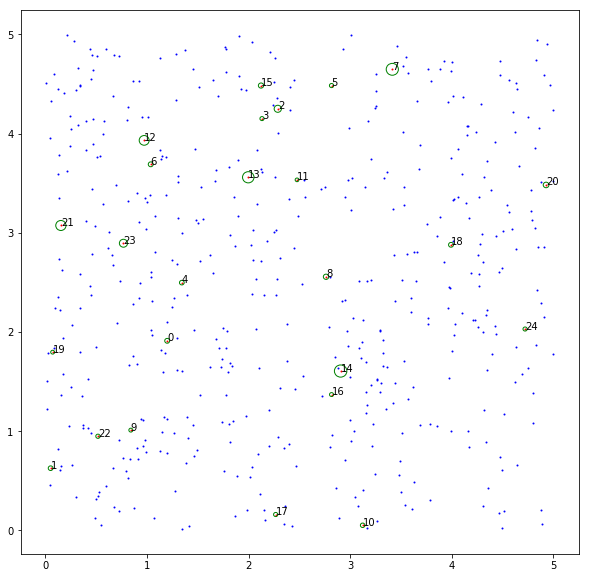

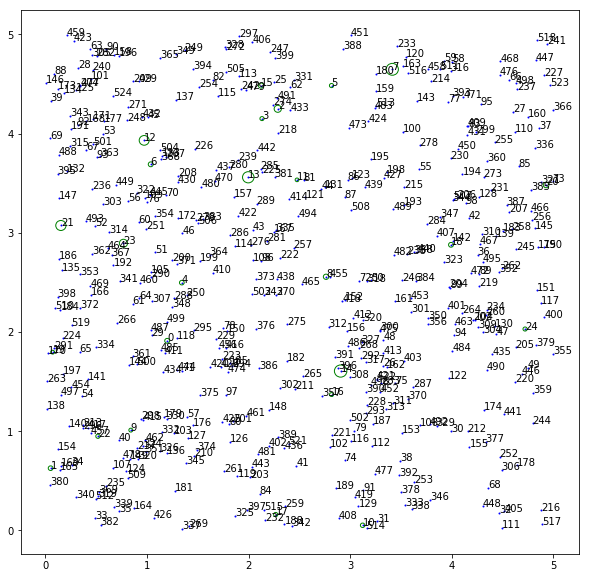

In [18]:
# Plots LRG sources and EDR sources
plt.figure(figsize=(10,10))

plt.scatter(ra_BKG, dec_BKG, s = 1, color='blue')
plt.scatter(ra_LRG, dec_LRG, s = 1, color='red')

# Plots circles around LRG sources 
circle = []
for i in range(len(ra_LRG)):
    circle = plt.Circle((ra_LRG[i],dec_LRG[i]), dist[i], color='green', fill=False)
    plt.gcf().gca().add_artist(circle)
    
# prints ID numbers next to LRG
# This will be slightly different when using real data because those sources have real ID numbers
a = np.arange(0,lrg)
for i, txt in enumerate(a):
    text = plt.annotate(txt, (ra_LRG[i],dec_LRG[i]))
    text.set_fontsize(10)

plt.show()
              
              
plt.figure(figsize=(10,10))

plt.scatter(ra, dec, s = 1, color='blue')
              
# Plots circles around LRG sources 
circle = []
for i in range(len(ra_LRG)):
    circle = plt.Circle((ra_LRG[i],dec_LRG[i]), dist[i], color='green', fill=False)
    plt.gcf().gca().add_artist(circle)
    
# prints ID numbers next to LRG
# This will be slightly different when using real data because those sources have real ID numbers
a = np.arange(0,len(ra))
for i, txt in enumerate(a):
    text = plt.annotate(txt, (ra[i],dec[i]))
    text.set_fontsize(10)

plt.show()

